# Problem Statement
Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

First off, I need to get hold of the mnist dataset. The mldata.org website referenced in the text is down and out so I looked up an alternate source for the mnist dataset. 

Note that I understand what the textbook was talking about in section two with setting everything up as a function so that you can run it all again later if needed. Here, at least for a lot of this problem, that is less necessary because the jupyter cells themselves act like functions that I can repeat if needed.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', '

Seems to be the same thing. Lets look a little closer and make sure that we actually have some digits

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.  

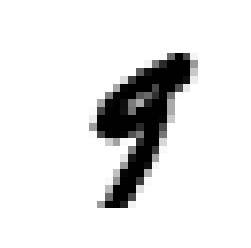

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as pyplot
import numpy

X = mnist["data"]
y = mnist["target"]


sample = X[36000]
sampleImage = sample.reshape(28,28)
print(sampleImage)

pyplot.imshow(sampleImage, cmap = matplotlib.cm.binary, interpolation="nearest")
pyplot.axis("off")
pyplot.show()

Awesome! The values seem to be in the range 0 to 256 (which makes sense for black and white images), so they should be normalized into the range 0 to 1 with a simple devide.

Then we need to split the data into a training set and a test set so that I can stop looking at the test data.

In [3]:
X = X / 256.0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31415)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

print()

(44800, 784)
(11200, 784)
(14000, 784)
(44800,)
(11200,)
(14000,)



Now to start looking at some models. The problem statement suggested the KNearestNeighbors classifiers, so I'll start there.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighborsClassifier = KNeighborsClassifier(n_jobs=-1)
print(neighborsClassifier.fit(X_train,y_train).score(X_validation, y_validation))

0.9689285714285715


Not bad for a first try, now to try out the grid search as suggested in the problem statement

In [ ]:
from sklearn.mo del_selection import GridSearchCV

param_grid = { 
    "n_neighbors": [3,5,9],
    "weights": ["uniform", "distance"],
    "leaf_size": [15,30,60,90],
    "p": [1,2]
}

search = GridSearchCV(neighborsClassifier, param_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)
print(search.best_params_)

Some notes on the GridSearchCV run:
* started at about 5:00pm Saturday
* finished at 7:37am the following Tuesday
* run on an intel core i5-4690k running at 3.5 Ghz with 8GB of RAM clocked at 1333 MHz

For the record (so I don't have to run the algorithm again) the best params found were:
{'leaf_size': 15, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [ ]:
print(search.best_score_)
print(search.refit_time_)

Well, that didn't quite get us there, but the leaf size and nubmer of neighbors are both at the min values I selected for the search. So I guess I need to repeat the search with some smaller values for those fields.

In [ ]:
param_grid = { 
    "n_neighbors": [1,2,3,4],
    "weights": ["distance"],
    "leaf_size": [8,12,15,17],
    "p": [2]
}

search = GridSearchCV(neighborsClassifier, param_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.refit_time_)

So that just barely tips us over the edge there, but this is just our training data and this data may have been inadvertently overfitted. Lets see what it looks like on my validation set before we jump into the final test set.

In [5]:
neighborsClassifier.leaf_rize = 8
neighborsClassifier.n_neighbors = 4
neighborsClassifier.p = 2
neighborsClassifier.weights = "distance"
neighborsClassifier.fit(X_train, y_train)
print(neighborsClassifier.score(X_validation, y_validation))

0.9723214285714286


wow, that's a fair sized difference. Lets go ahead and try on the test set.

In [6]:
print(neighborsClassifier.score(X_test, y_test))

0.9698571428571429


Well, that's awfully dang close to 97%. Round up?

# Problem Statement 2
Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

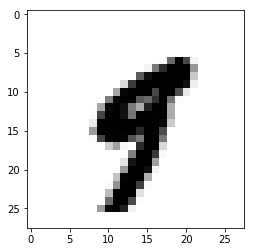

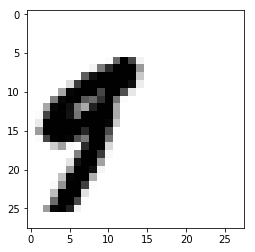

In [7]:
from scipy.ndimage.interpolation import shift

def ShiftImage(img, x, y):
    tmpImg = img.reshape(28,28)
    tmpImg = shift(tmpImg, (y,x))
    return tmpImg.reshape(28*28)


sample = X[36000]
sampleShifted = ShiftImage(sample, -7, 0)
sampleImage = sample.reshape(28,28)
sampleShiftedImage = sampleShifted.reshape(28,28)

pyplot.imshow(sampleImage, cmap = matplotlib.cm.binary, interpolation="nearest")
pyplot.show()

pyplot.imshow(sampleShiftedImage, cmap = matplotlib.cm.binary, interpolation="nearest")
pyplot.show()

Excellent, the shift function is working. Now lets make the new, expanded data set

In [ ]:
newItems = []
for i in range(0,X_train.shape[0]):
    img = X_train[i]
    newItems.append(ShiftImage(img, -1,  0))
    newItems.append(ShiftImage(img,  1,  0))
    newItems.append(ShiftImage(img,  0, -1))
    newItems.append(ShiftImage(img,  0,  1))
    
print(len(newItems))

In [8]:
X_train_expanded = X_train.copy()
numRows = X_train.shape[0]
numCols = X_train.shape[1]
X_train_expanded.resize((numRows * 5, numCols))

for i in range(0,numRows):
    img = X_train[i]
    X_train_expanded[numRows   + i] = ShiftImage(img, -1,  0)
    X_train_expanded[numRows*2 + i] = ShiftImage(img,  1,  0)
    X_train_expanded[numRows*3 + i] = ShiftImage(img,  0, -1)
    X_train_expanded[numRows*4 + i] = ShiftImage(img,  0,  1)
    
y_train_expanded = y_train.copy()
y_train_expanded.resize((numRows*5))

for i in range(0, numRows):
    label = y_train_expanded[i]
    y_train_expanded[numRows   + i] = label
    y_train_expanded[numRows*2 + i] = label
    y_train_expanded[numRows*3 + i] = label
    y_train_expanded[numRows*4 + i] = label
    
print(X_train_expanded.shape)
print(y_train_expanded.shape)

(224000, 784)
(224000,)


In [10]:
neighborsClassifier2 = KNeighborsClassifier(n_jobs=-1)
neighborsClassifier2.fit(X_train_expanded,y_train_expanded)
print(neighborsClassifier2.score(X_test, y_test))

0.9757857142857143
